# Assignment

## Importing Libraries

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Datasets

In [2]:
cifar_dataset_train = datasets.CIFAR10(root='./data',train=True,download=True,transform=torchvision.transforms.ToTensor())

cifar_dataset_test = datasets.CIFAR10(root='./data',train=False,download=True,transform=torchvision.transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


## Creating the training dataset

In [3]:
from torch.utils.data import DataLoader
batch_size = 256

train_iter = DataLoader(cifar_dataset_train,batch_size,shuffle=True)

In [4]:
X,y = next(iter(train_iter))

## Creating the test dataset

In [5]:
test_iter = DataLoader(cifar_dataset_test,batch_size,shuffle=True)

In [6]:
X_test,y_test = next(iter(test_iter))

## Analysing the CIFAR-10 data

In [7]:
print(f'The dimensions of each input image is {X.size()} The number of input channels is {X.size()[1]}')
print(f'The output labels are as follows {y}')

The dimensions of each input image is torch.Size([256, 3, 32, 32]) The number of input channels is 3
The output labels are as follows tensor([4, 2, 8, 1, 3, 0, 3, 1, 6, 2, 8, 6, 9, 9, 4, 8, 1, 2, 6, 7, 1, 5, 1, 8,
        3, 6, 1, 5, 7, 6, 0, 5, 7, 3, 3, 0, 6, 5, 9, 7, 2, 2, 4, 5, 1, 6, 8, 8,
        2, 6, 3, 0, 3, 0, 8, 0, 5, 9, 7, 7, 5, 2, 5, 4, 2, 7, 5, 7, 5, 6, 5, 9,
        7, 0, 8, 2, 1, 8, 3, 0, 4, 1, 4, 2, 4, 6, 0, 4, 5, 4, 8, 7, 9, 6, 6, 5,
        3, 4, 3, 8, 9, 1, 4, 7, 8, 3, 2, 1, 9, 8, 6, 0, 7, 8, 5, 6, 6, 2, 3, 9,
        8, 9, 9, 3, 2, 9, 4, 2, 2, 6, 3, 7, 1, 9, 0, 7, 0, 6, 5, 5, 3, 4, 3, 4,
        1, 4, 2, 3, 1, 1, 2, 1, 4, 0, 4, 3, 9, 4, 6, 8, 3, 8, 4, 6, 0, 6, 5, 1,
        0, 5, 8, 8, 4, 5, 0, 0, 4, 1, 2, 2, 3, 0, 0, 0, 4, 8, 8, 6, 6, 0, 6, 7,
        1, 5, 5, 3, 8, 8, 9, 2, 3, 2, 0, 8, 8, 0, 5, 1, 7, 6, 2, 6, 1, 2, 5, 6,
        4, 7, 9, 4, 5, 3, 2, 5, 1, 9, 5, 4, 7, 9, 8, 0, 6, 9, 9, 8, 2, 5, 8, 3,
        1, 8, 5, 4, 7, 2, 0, 8, 2, 7, 9, 9, 4, 2, 4, 6])


## Example image

C:\Users\ifeda\AppData\Local\Temp\ipykernel_12884\591414796.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3575.)
  plt.imshow(X[1].T)


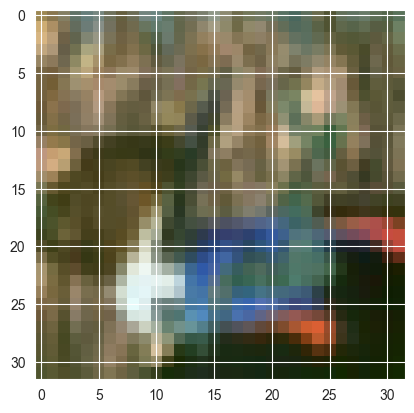

In [8]:
plt.imshow(X[1].T)

## CNN Architecture

- The output features for the basic linear layer has match the number of convolutions
- check if the input to the convolution should be in one or 2 dimensions

In [149]:
class CNN(torch.nn.Module):
    def __init__(self,num_inputs,num_channels,num_outputs):
        super(CNN,self).__init__()
        self.num_inputs = num_inputs
        self.num_channels = num_channels
        self.num_outputs = num_outputs

        #Spatial/Global Pooling for input
        self.spatial_avg_pool = torch.nn.AdaptiveAvgPool2d((12,12))

        # Design the base block Element
        # Create an input linear layer for future combination
        self.linear1 = torch.nn.Linear(num_inputs,out_features=2)
        self.relu1 = torch.nn.ReLU()

        self.conv1 = torch.nn.Conv2d(num_channels,out_channels=6,kernel_size=5,stride=1,padding=1)
        self.relu2 = torch.nn.ReLU()

        self.conv2 = torch.nn.Conv2d(num_channels,out_channels=12,kernel_size=5,stride=1,padding=1)
        self.relu3 = torch.nn.ReLU()

        #Create the dense layer creating a FC linear layer to the output


    def forward(self,x):
        # Applying average pooling to downsample the image from 32 ->12
        a = self.spatial_avg_pool(x)

        #Reshape the tensor to allow for matrix multiplication
        a = a.view(a.size(0),-1)

        a = self.linear1(a)
        a = self.relu1(a)

        # Get outputs of each convolution ->RelU layer
        o1 = self.conv1(x)
        o1 = self.relu2(o1)

        o2 = self.conv2(x)
        o2 = self.relu3(o2)

        O = torch.cat([o1,o2],dim=1)

        output = torch.matmul(O.view(-1,2),a.T)

        return output

In [150]:
model = CNN(num_inputs=432,num_channels=3,num_outputs=10)
print(model)

CNN(
  (spatial_avg_pool): AdaptiveAvgPool2d(output_size=(12, 12))
  (linear1): Linear(in_features=432, out_features=2, bias=True)
  (relu1): ReLU()
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv2): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
)


In [152]:
model(X).size()

torch.Size([2073600, 256])

In [139]:
X.size(0)

256

In [140]:
test_pool = torch.nn.AdaptiveAvgPool2d((12,12))
t = test_pool(X)
t = t.view(t.size(0),-1)
t.size()

torch.Size([256, 432])

In [132]:
l = torch.nn.Linear(in_features=432,out_features=2)
b =l(t)
r = torch.nn.ReLU()
b = r(b)

In [133]:
b.size()

torch.Size([256, 2])

In [107]:
a = model(X)
a.size()

torch.Size([256, 18, 30, 30])

In [136]:
torch.matmul(a.view(-1,2),b.T).size()

torch.Size([2073600, 256])